#  Fake News Detection
### Tridib Dalui

In [1]:
import numpy as np
import pandas as pd

C:\Users\tridi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df=pd.read_csv('news.csv')

In [3]:
df.sample(10)

,Unnamed: 0,title,text,label
5238,3503,Obama on future of terror after bin Laden raid,Washington (CNN) On the fifth anniversary of O...,REAL
6214,8855,Tony Blair suggests a second referendum to rev...,Tony Blair suggests a second referendum to rev...,FAKE
3965,2030,Bush and Romney: Ready to rumble?,A verdict in 2017 could have sweeping conseque...,REAL
5926,5805,The Glorious New PC NFL Starts Next Monday!,"Afraid of ""dangerous"" Trump presidency, protes...",FAKE
2054,10031,"Don’t Root, Root, Root for the Racist, Red-Fac...","Don’t Root, Root, Root for the Racist, Red-Fac...",FAKE
810,5089,Trump: I wouldn't accept Cruz's endorsement,"""If he gives it, I will not accept it,"" Trump ...",REAL
3678,8758,"TRUMPED: After Deceiving The American People, ...",NTEB Ads Privacy Policy TRUMPED: After Deceivi...,FAKE
918,4283,"Palin’s endorsement the latest prize as Trump,...",The escalating feud between Donald Trump and T...,REAL
3015,3580,Why does ISIS keep making enemies?,Peter Bergen is CNN's national security analys...,REAL
3567,1618,Donald Trump: 'I want surveillance of certain ...,(CNN) Donald Trump is ratcheting up his rhetor...,REAL


In [4]:
df.shape

(6335, 4)

### Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
# here the unnamed 0 column has no work so lets drop that

df=df.drop('Unnamed: 0',axis=1)

In [7]:
#to check how many outputs do we have

df['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [8]:
# checking for null values

df.isna().sum()

title    0
text     0
label    0
dtype: int64

In [9]:
# check for duplicate values

df.duplicated().sum()

29

In [10]:
#to drop duplicate values

df=df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
#satistical description

df.describe()

,title,text,label
count,6306,6306,6306
unique,6256,6060,2
top,Michael Moore Owes Me $4.99,"Killing Obama administration rules, dismantlin...",REAL
freq,3,57,3154


for real news

In [13]:
df[df['label']=='REAL'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3154 entries, 2 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   3154 non-null   object
 1   text    3154 non-null   object
 2   label   3154 non-null   object
dtypes: object(3)
memory usage: 98.6+ KB


In [14]:
df[df['label']=='REAL'].describe()

,title,text,label
count,3154,3154,3154
unique,3149,2989,1
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,3,57,3154


for fake news

In [15]:
df[df['label']=='FAKE'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3152 entries, 0 to 6332
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   3152 non-null   object
 1   text    3152 non-null   object
 2   label   3152 non-null   object
dtypes: object(3)
memory usage: 98.5+ KB


In [16]:
df[df['label']=='FAKE'].describe()

,title,text,label
count,3152,3152,3152
unique,3107,3071,1
top,Get Ready For Civil Unrest: Survey Finds That ...,,FAKE
freq,3,36,3152


In [17]:
# we have to do the analysis on any one column so I'm going to work with Text column

df=df.drop('title',axis=1)

### Data Visulaization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot: xlabel='label', ylabel='count'>

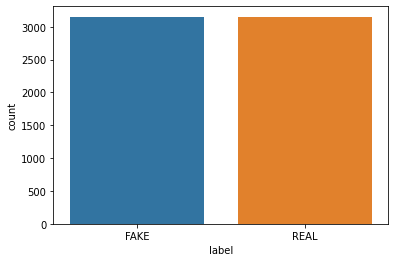

In [19]:
#histogram

sns.countplot(x=df['label'])

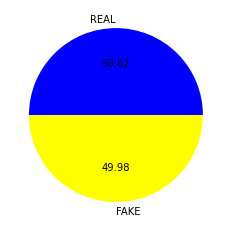

In [20]:
#pie chart

plt.pie(df['label'].value_counts(),labels=['REAL','FAKE'],colors=['blue','yellow'],autopct='%0.2f')
plt.show()

data is well distributed

### Making Data Ready for Model fitting

In [21]:
#to make the label neumerical from categorical

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['label']=le.fit_transform(df['label'])

In [22]:
df.sample(10)

,text,label
608,"In some gas stations around the country, the p...",1
4264,November 4: Daily Contrarian Reads By David St...,0
299,Congress faces a June 1 deadline for the law's...,1
3087,Remember the last debate when the internet ble...,0
4502,Recipient Email => \nThere’s playing with fi...,0
1807,President-elect Donald Trump has said he plans...,0
6032,Many see a double standard in the FBI's recomm...,1
5008,Meet the journalist facing 45 years in jail fo...,0
4294,Sean Hannity SHREDS FBI Director James Comey f...,0
635,(CNN) Donald Trump on Wednesday refused to say...,1


0=real news && 1=fake news

In [23]:
# function to change the texts (title,text) machine understandable

import re

def convert(text):
    text = text.lower()
    text = re.sub(r'https?://S+|www\.\S+' , '' , text)
    text = re.sub('\n' , '' , text)
    text = re.sub('\[.*?\]', '', text)
    words = []
    for i in text:
        if i not in string.punctuation:
            words.append(i)
    return ''.join(words)

In [24]:
import string

df["text"] = df["text"].apply(convert)

after conversion data is

In [25]:
df.sample(10)

,text,label
3897,after the bombshell announcement friday that t...,1
80,democratic national committee officials on sat...,1
439,there’s not really any good news for the gop i...,1
669,trump has been the leader for several months n...,1
802,donald trump the next president of the united ...,0
5429,videos will barack obama delay or suspend the ...,0
3265,by christina sarichjordan — you’ve already hea...,0
5942,federal taxpayers dumped more than 205 million...,1
1384,the recent murders at a colorado springs plann...,1
5726,comments republican nominee donald trump is an...,0


### Seperating input & output data

In [26]:
x=df['text']
y=df['label']

### Making the Traing and testing dataset

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

### To convert Text Data to vectors 

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train= vectorization.fit_transform(X_train)
x_test = vectorization.transform(X_test)

### Model fitting

#### Here we will use 4 algorithms
1)Logistic Regression 2)Decision tree classifier 3)Random tree classifier 4)Naive Bayes

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print(x_train.shape)
print(y_train.shape)

(4729, 103897)
(4729,)


In [31]:
# 1) Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
LogisticRegression()
pred_lr=LR.predict(x_test)
LR.score(x_test, y_test)

0.9143944197844007

In [32]:
# 2) Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model4=dtc.fit(x_train,y_train)
prediction2=model4.predict(x_test)
accuracy_score(y_test,prediction2)

0.7901077996195307

In [33]:
# 3) Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model8=rfc.fit(x_train,y_train)
prediction3=model8.predict(x_test)
accuracy_score(y_test,prediction3)

0.8979074191502854

In [34]:
# 4) Multinomial naive Bayes

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train , y_train)
model16=nb.fit(x_train,y_train)
prediction4=model16.predict(x_test)
accuracy_score(y_test,prediction4)

0.8205453392517438

#### So Logistic Regres is giving the best accuracy 

In [35]:
def answer(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(convert) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)

    return print("\n\n Prediction: {} ".format(answer(pred_LR[0])))

In [36]:
news='shocking  michele obama   hillary caught glamorizing date rape promoters first lady claims moral high ground while befriending rape glorifying rappers infowars com   october    comments  alex jones breaks down the complete hypocrisy of michele obama and hillary clinton attacking trump for comments he made over a decade ago while the white house is hosting and promoting rappers who boast about date raping women and selling drugs in their music   rappers who have been welcomed to the white house by the obama s include  rick ross   who promotes drugging and raping woman in his song  u o n e o    while attacking trump as a sexual predator  michelle and hillary have further mainstreamed the degradation of women through their support of so called musicians who attempt to normalize rape  newsletter sign up get the latest breaking news   specials from alex jones and the infowars crew  related articles'
testing(news) # original answer fake news



 Prediction: Fake News 


In [37]:
news='october    at   am  pretty factual except for women in the selective service  american military is still voluntary only and hasn t been a draft since vietnam war  the comment was made by a  star general of the army about drafting women and he said it to shut up liberal yahoos  '
testing(news) # original fake news



 Prediction: Fake News 


#### So our model is working Fine

### Saving The Model

In [38]:
import pickle

In [39]:
pickle.dump(LR,open('fake_news_detector.pkl','wb'))

# Thank You